In [1]:
#DATA EXPLORATION
# IMPORTING LIBRARIES FOR DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#IGNORE HARMLESS WARNINGS
import warnings
warnings.filterwarnings("ignore")
#SET TO DISPALY ALL COLUMNS IN THE DATA SET
pd.set_option("display.max_columns",None)

In [2]:
#LOADING THE DATA SET
#url="http://bit.ly/w-data"
iddata=pd.read_csv(r"C:\Users\R Sobha Supriya\Downloads\Iris.csv",header=0)
#COPY THE BACK-UP FILES
iddata_bk=iddata.copy()
#DISPLAY THE DATA
iddata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iddata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#DISPLAY THE DATA SET INFORMATION
iddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#DISPLAY THE TOTAL SHAPE THAT INCLUDES NO OF RECORDS AND ATTRIBUTES OF DATA SET
iddata.shape

(150, 6)

In [7]:
#TO DISPLAY MISSING VALUES IN DATA SET
iddata.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#TO IDENTIFY DUPLICATES IN DATA SET
iddata.duplicated().any()

False

In [10]:
iddata.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
#use label encoder to handle categorical data
#from sklearn.preprocessing import LabelEncoder
#LE=LabelEncoder()
#iddata["Species"]=LE.fit_transform(iddata[["Species"]])

In [12]:
iddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
x=iddata.iloc[:,[3,4]].values
x=pd.DataFrame(x)
x.head()

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


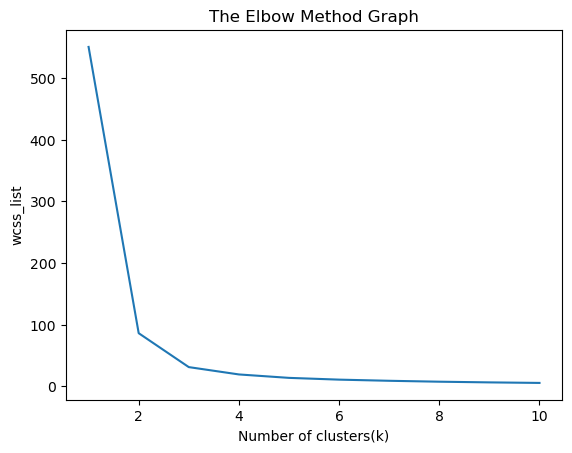

In [14]:
# Coding - 01
# Finding the optimal number of clusters using the elbow method

from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

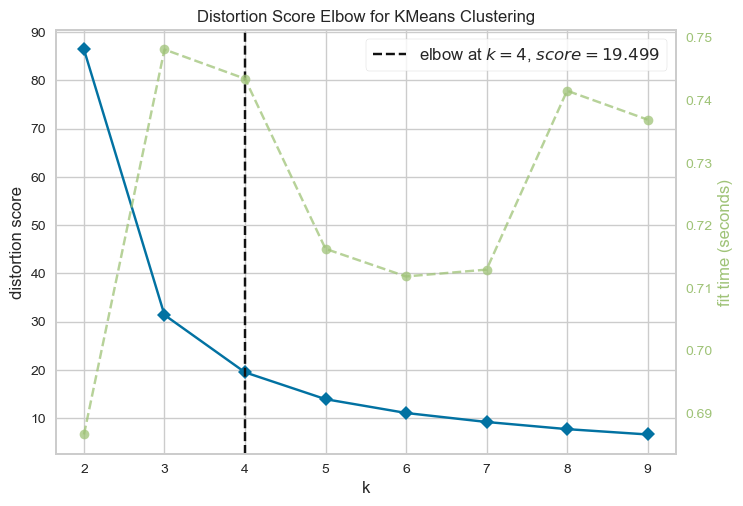

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer

# identified 2 variables - Annual Income (k$) & Spending Score (1-100

# Instantiate the clustering model and visualizer

from sklearn.cluster import KMeans

KM = KMeans(random_state=42)

visualizer = KElbowVisualizer(KM, k=(2,10))
 
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [16]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_pred=kmeans.fit_predict(x)


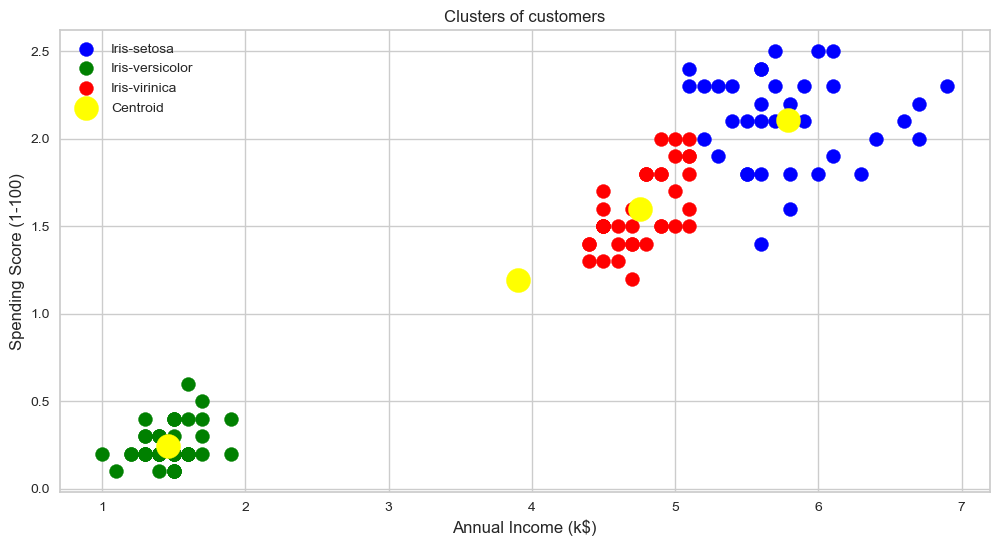

In [21]:
x = np.array(x)
plt.figure(figsize=(12,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa') #for first cluster  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolor') #for second cluster  
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Iris-virinica') #for third cluster  
#plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'black', label = 'Cluster 3') #for fourth cluster  
#plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'purple', label = 'Cluster 4') #for fifth cluster    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

In [22]:
iddata['Cluster_Id']=kmeans.labels_
iddata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [23]:
iddata.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Id
17,18,5.1,3.5,1.4,0.3,Iris-setosa,1
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2
129,130,7.2,3.0,5.8,1.6,Iris-virginica,0
86,87,6.7,3.1,4.7,1.5,Iris-versicolor,2
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2
27,28,5.2,3.5,1.5,0.2,Iris-setosa,1
109,110,7.2,3.6,6.1,2.5,Iris-virginica,0
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2
137,138,6.4,3.1,5.5,1.8,Iris-virginica,0
107,108,7.3,2.9,6.3,1.8,Iris-virginica,0
